<a href="https://colab.research.google.com/github/SammyXu129/DataScience-Customer_Churn_Prediction_Model/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem
We will develop a machine learning model that can predict customers who will leave the company.

Resource:
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [134]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline

# importing method to perform cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#importing methods for model evaluation
from sklearn import metrics

In [135]:
telco_df = pd.read_excel("/content/02 Churn-Dataset.xlsx")
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


## Data Cleaning

In [136]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['Churn'] = telco_df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].astype('object')


In [138]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [139]:
telco_df.dropna(inplace = True)

In [140]:
telco_df.drop(['customerID'], axis = 1, inplace = True)

In [141]:
telco_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [142]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1


In [143]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn'],
      dtype='object')

### Featuer Selection and Engineer


In [144]:
# feature engineering
def engineered_features(df):
    df_new = df.copy()

    # Annual Categorical Variable from Tenure
    df_new.loc[(df_new["tenure"]>=0) & (df_new["tenure"]<=12),"NewTenureYear"] = "0-1 Year"
    df_new.loc[(df_new["tenure"]>12) & (df_new["tenure"]<=24),"NewTenureYear"] = "1-2 Year"
    df_new.loc[(df_new["tenure"]>24) & (df_new["tenure"]<=36),"NewTenureYear"] = "2-3 Year"
    df_new.loc[(df_new["tenure"]>36) & (df_new["tenure"]<=48),"NewTenureYear"] = "3-4 Year"
    df_new.loc[(df_new["tenure"]>48) & (df_new["tenure"]<=60),"NewTenureYear"] = "4-5 Year"
    df_new.loc[(df_new["tenure"]>60) & (df_new["tenure"]<=72),"NewTenureYear"] = "5-6 Year"


    # Total Services
    df_new["TotalServices"] = df_new[["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup",
                              "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].apply(lambda x:(x == "Yes").sum(), axis=1)


    # Churn Risk Score
    df_new["ChurnRiskScore"] = ((df_new["Contract"] == "Month-to-month").astype(int) * 3 +
                            (df_new["PaperlessBilling"] == "Yes").astype(int) * 2 +
                            (df_new["PaymentMethod"] == "Electronic check").astype(int) * 2 +
                            (df_new["TotalServices"] < 2).astype(int) * 2 +
                            (df_new["tenure"] < 12).astype(int) * 3)

    # Service Satisfaction Index
    df_new["ServiceSatisfactionIndex"] = df_new[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]].apply(lambda x: (x == "Yes").sum(), axis=1)

    # Engagement Score
    df_new["EngagementScore"] = df_new[["StreamingTV", "StreamingMovies"]].apply(lambda x: (x == "Yes").sum(), axis=1
                            ) + (df_new["InternetService"] != "No").astype(int) * 2 + (df_new["PhoneService"] == "Yes").astype(int)

    # Family Status
    df_new["FamilyStatus"] = ((df_new["Partner"] == "Yes") & (df_new["Dependents"] == "Yes")).astype(int)


    # Service Adoption Speed
    df_new["ServiceAdoptionSpeed"] = df_new["TotalServices"] / df_new["tenure"]

    # Contract Commitment Level
    df_new["ContractCommitmentLevel"] = df_new["Contract"].map({"Month-to-month": 1, "One year": 12, "Two year": 24})

    # Payment Reliability
    df_new["PaymentReliability"] = (df_new["PaymentMethod"].isin(["Bank transfer (automatic)", "Credit card (automatic)"])).astype(int)

    # Service Value Ratio
    df_new["ServiceValueRatio"] = df_new["TotalServices"] / df_new["MonthlyCharges"]


    df_new.rename(columns={"tenure": "Tenure"}, inplace=True)

    return df_new

df_new_feature = engineered_features(telco_df)

df_new_feature.head()


,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,NewTenureYear,TotalServices,ChurnRiskScore,ServiceSatisfactionIndex,EngagementScore,FamilyStatus,ServiceAdoptionSpeed,ContractCommitmentLevel,PaymentReliability,ServiceValueRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0-1 Year,1,12,1,2,0,1.000000,1,0,0.033501
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,2-3 Year,3,0,2,3,0,0.088235,12,0,0.052678
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0-1 Year,3,8,2,3,0,1.500000,1,0,0.055710
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,3-4 Year,3,0,3,2,0,0.066667,12,1,0.070922
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0-1 Year,1,12,0,3,0,0.500000,1,0,0.014144


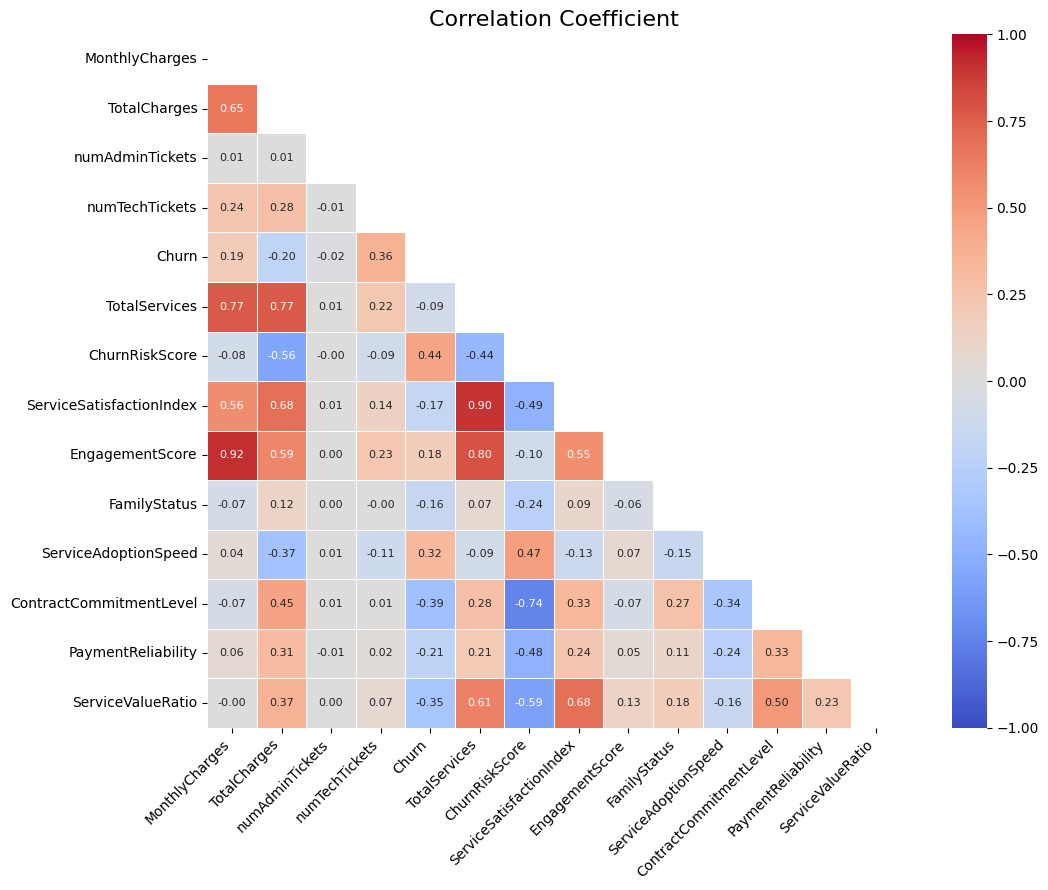

In [145]:
numerical_cols = [col for col in df_new_feature.columns if df_new_feature[col].dtype in ['int64', 'float64'] and col != 'Tenure']

numerical_df = df_new_feature.loc[:, numerical_cols]

plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))

sns.heatmap(numerical_df.corr().round(2), annot=True, mask=mask,
            vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 8},
            cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Coefficient', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [146]:
drop_list = [ 'TotalServices','EngagementScore']
df_new_feature = df_new_feature.drop(drop_list, axis = 1)

In [147]:
df_new_feature.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,numTechTickets,Churn,NewTenureYear,ChurnRiskScore,ServiceSatisfactionIndex,FamilyStatus,ServiceAdoptionSpeed,ContractCommitmentLevel,PaymentReliability,ServiceValueRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,0-1 Year,12,1,0,1.000000,1,0,0.033501
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,0,2-3 Year,0,2,0,0.088235,12,0,0.052678
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,1,0-1 Year,8,2,0,1.500000,1,0,0.055710
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,3,0,3-4 Year,0,3,0,0.066667,12,1,0.070922
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,1,0-1 Year,12,0,0,0.500000,1,0,0.014144


### Data Processing

In [148]:
# 1. encode binary features
df_new_feature['SeniorCitizen'] =df_new_feature['SeniorCitizen'].map({1: "Yes", 0: "No"})

In [149]:
df_new_feature['FamilyStatus'] = df_new_feature['FamilyStatus'].map({0: 'No', 1: 'Yes'})

In [150]:
df = df_new_feature.copy()

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dtype=int, drop_first=drop_first)
    return dataframe

def grab_col_columns(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

    num_cols = [col for col in df.columns if df[col].dtypes == "int64" or df[col].dtypes == "float64"]


    return cat_cols, num_cols



In [151]:
# 2. one hot encoding
cat_cols, num_cols = grab_col_columns(df)
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,Tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,ContractCommitmentLevel,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NewTenureYear_1-2 Year,NewTenureYear_2-3 Year,NewTenureYear_3-4 Year,NewTenureYear_4-5 Year,NewTenureYear_5-6 Year,FamilyStatus_Yes
0,1,29.85,29.85,0,0,0,12,1,1.000000,1,...,1,0,1,0,0,0,0,0,0,0
1,34,56.95,1889.50,0,0,0,0,2,0.088235,12,...,0,0,0,1,0,1,0,0,0,0
2,2,53.85,108.15,0,0,1,8,2,1.500000,1,...,1,0,0,1,0,0,0,0,0,0
3,45,42.30,1840.75,0,3,0,0,3,0.066667,12,...,0,0,0,0,0,0,1,0,0,0
4,2,70.70,151.65,0,0,1,12,0,0.500000,1,...,1,0,1,0,0,0,0,0,0,0


In [152]:
df[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,ContractCommitmentLevel,PaymentReliability,ServiceValueRatio
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785,5.051052,1.265358,0.285081,8.813851,0.435580,0.045397
std,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782,3.302436,1.286277,0.493678,9.541690,0.495868,0.017056
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,2.000000,0.000000,0.062500,1.000000,0.000000,0.034985
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,5.000000,1.000000,0.100000,1.000000,0.000000,0.047893
75%,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000,8.000000,2.000000,0.242500,12.000000,1.000000,0.054348
max,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000,12.000000,4.000000,5.000000,24.000000,1.000000,0.096000


In [153]:
df['Churn'] = df['Churn'].astype('object')

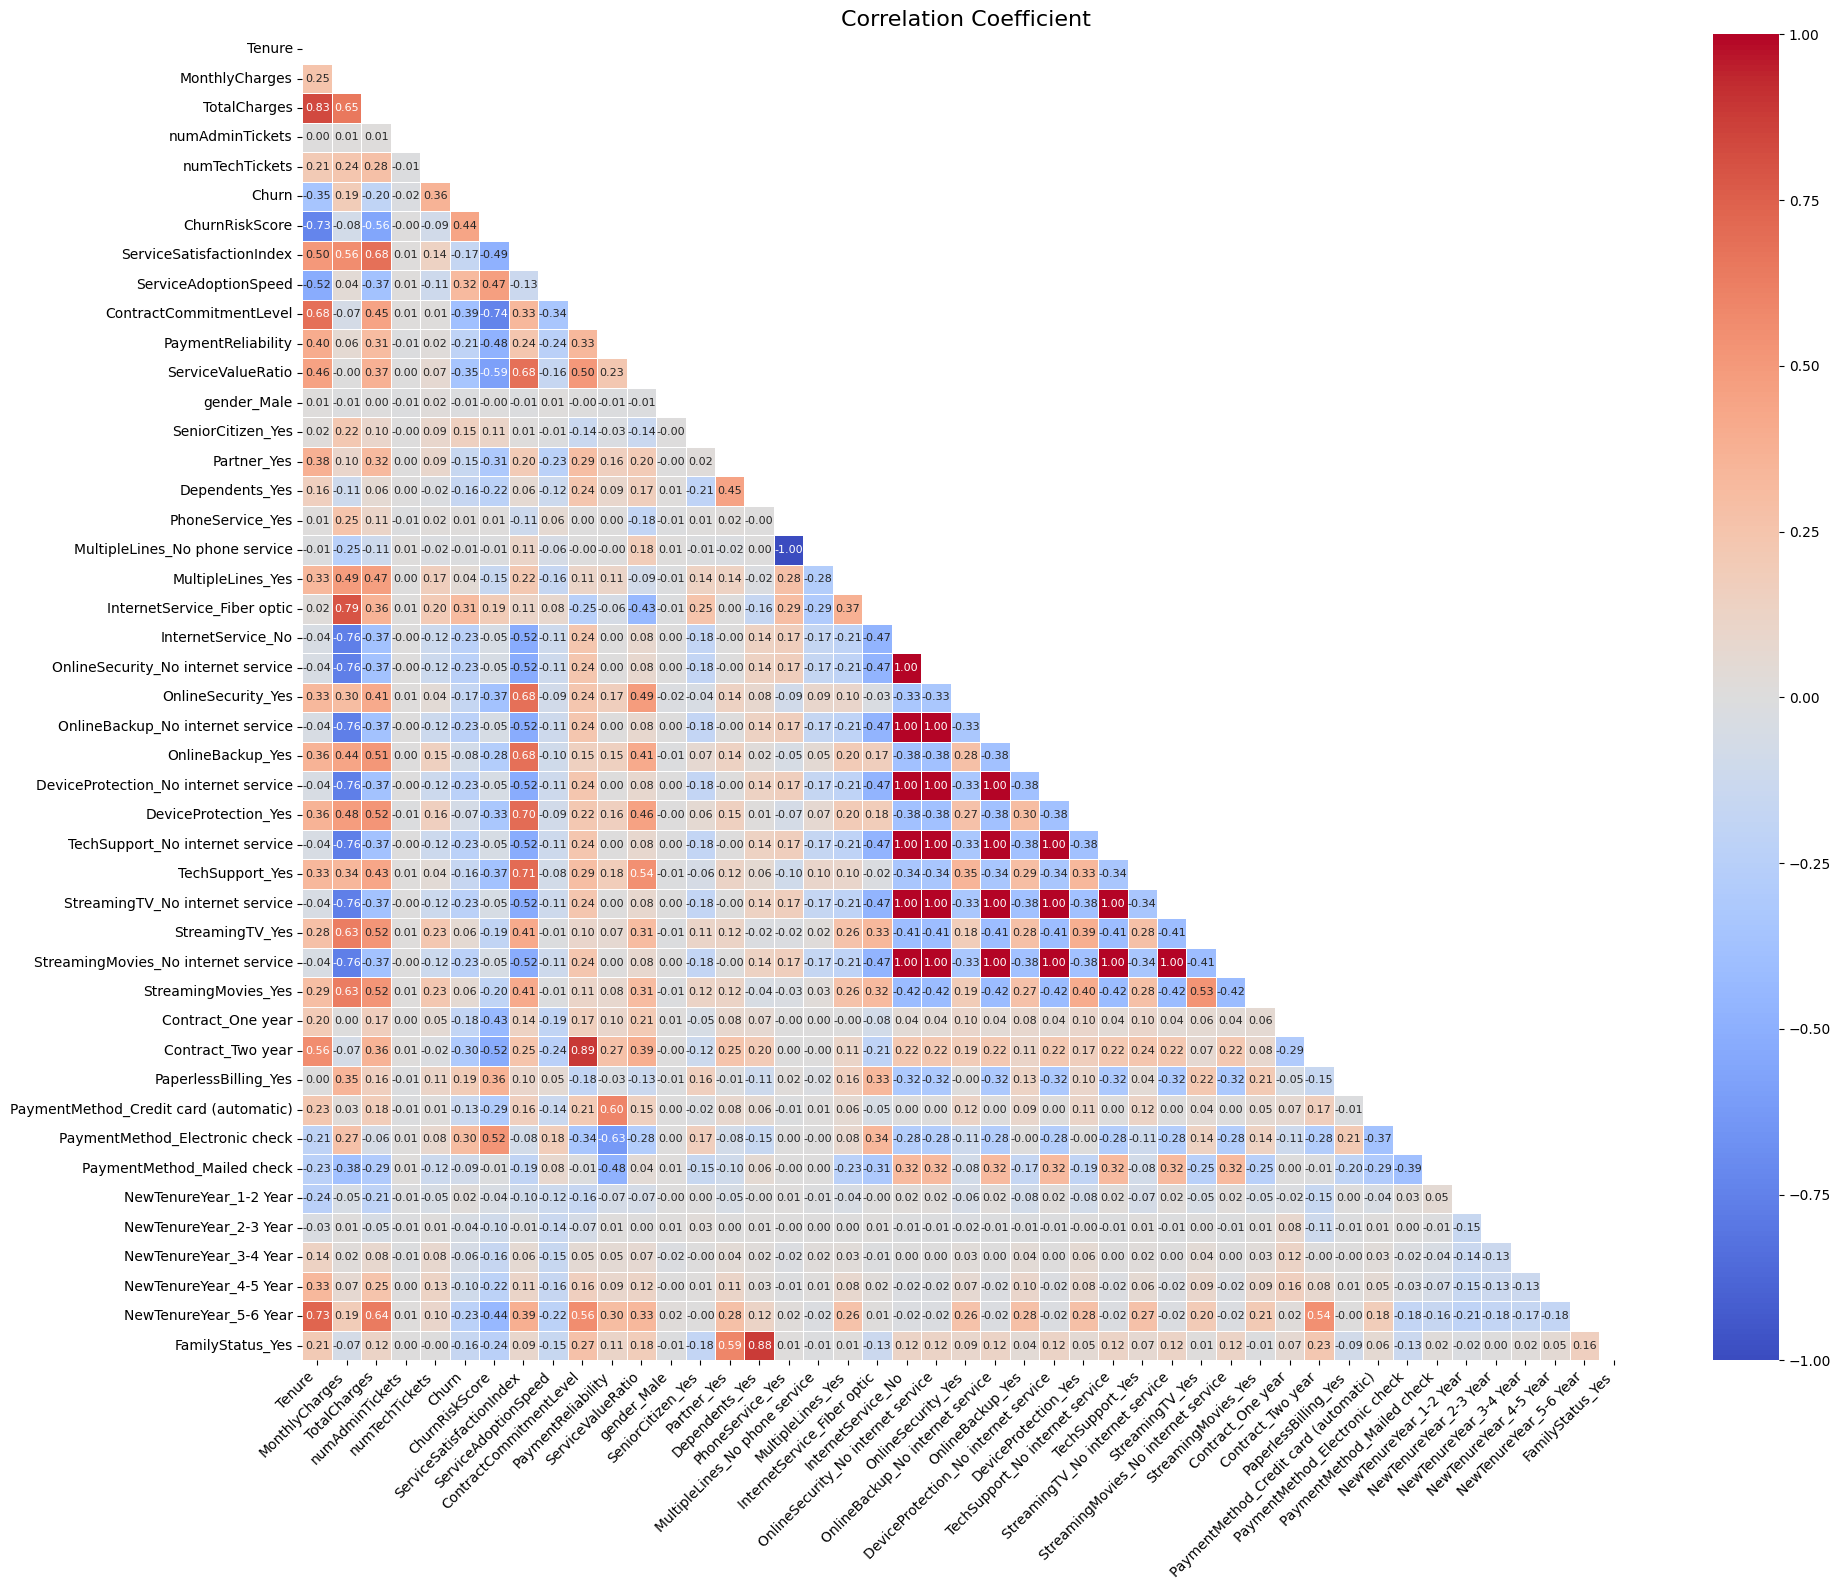

In [154]:

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr().round(2), annot=True, mask=mask,
            vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 8},
            cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Coefficient', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [155]:
# drop uncessary features
# drop correlated features

drop_cols = ['TotalCharges', 'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'TechSupport_No internet service',
                'OnlineBackup_No internet service','OnlineSecurity_No internet service', 'DeviceProtection_No internet service','MultipleLines_No phone service', 'FamilyStatus_Yes',
                  'ContractCommitmentLevel', 'EngagementScore']
for col in drop_cols:
  if col in df.columns:
    df.drop(col, axis=1, inplace=True)
#df_scaled = df_scaled.drop(drop_cols,  axis=1)

In [157]:
#3. scale feature
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()
for col in ['MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'ChurnRiskScore', 'ServiceSatisfactionIndex', 'ServiceAdoptionSpeed',
            'PaymentReliability', 'ServiceValueRatio']:
            if col != 'Churn':
              df_scaled[col] = scaler.fit_transform(df_scaled[[col]])
df_scaled.head()

,Tenure,MonthlyCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,PaymentReliability,ServiceValueRatio,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NewTenureYear_1-2 Year,NewTenureYear_2-3 Year,NewTenureYear_3-4 Year,NewTenureYear_4-5 Year,NewTenureYear_5-6 Year
0,1,-1.161694,-0.404239,-0.335937,0,2.104338,-0.206314,1.448252,-0.878482,-0.697518,...,0,1,0,1,0,0,0,0,0,0
1,34,-0.260878,-0.404239,-0.335937,0,-1.529602,0.571179,-0.398762,-0.878482,0.426904,...,0,0,0,0,1,0,1,0,0,0
2,2,-0.363923,-0.404239,-0.335937,1,0.893025,0.571179,2.461130,-0.878482,0.604713,...,0,1,0,0,1,0,0,0,0,0
3,45,-0.747850,-0.404239,2.062345,0,-1.529602,1.348672,-0.442455,1.138327,1.496635,...,0,0,0,0,0,0,0,1,0,0
4,2,0.196178,-0.404239,-0.335937,1,2.104338,-0.983807,0.435373,-0.878482,-1.832472,...,0,1,0,1,0,0,0,0,0,0


### ML Model

#### Logistic Regression

In [158]:
y = pd.to_numeric(df["Churn"])
X = df.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
y_train = y_train.ravel()
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
y_pred = model.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8450604122245914
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1033
           1       0.72      0.68      0.70       374

    accuracy                           0.85      1407
   macro avg       0.80      0.79      0.80      1407
weighted avg       0.84      0.85      0.84      1407



In [162]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[934,  99],
       [119, 255]])

In [163]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.293687
         Iterations 10
                                    Results: Logit
Model:                      Logit                   Method:                  MLE      
Dependent Variable:         y                       Pseudo R-squared:        0.493    
Date:                       2024-07-17 12:06        AIC:                     3369.9786
No. Observations:           5625                    BIC:                     3588.9328
Df Model:                   32                      Log-Likelihood:          -1652.0  
Df Residuals:               5592                    LL-Null:                 -3257.0  
Converged:                  1.0000                  LLR p-value:             0.0000   
No. Iterations:             10.0000                 Scale:                   1.0000   
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z    

In [164]:
drop_list = ['numAdminTickets', 'ServiceSatisfactionIndex', 'PaymentReliability', 'ServiceValueRatio', 'gender_Male', 'Partner_Yes','Dependents_Yes', 'StreamingTV_Yes',
             'StreamingMovies_Yes', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'NewTenureYear_1-2 Year','NewTenureYear_2-3 Year','NewTenureYear_3-4 Year',
             'NewTenureYear_4-5 Year','NewTenureYear_5-6 Year']
X_train = X_train.drop(drop_list, axis =1 )

In [166]:
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8450604122245914
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1033
           1       0.72      0.68      0.70       374

    accuracy                           0.85      1407
   macro avg       0.80      0.79      0.80      1407
weighted avg       0.84      0.85      0.84      1407



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [167]:
y = pd.to_numeric(df["Churn"])
X = df.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
y_pred = rf.predict(X_test)

In [169]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8400852878464818


In [170]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79a04d45f520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79a04d4532b0>})

In [171]:
best_rf = rand_search.best_estimator_

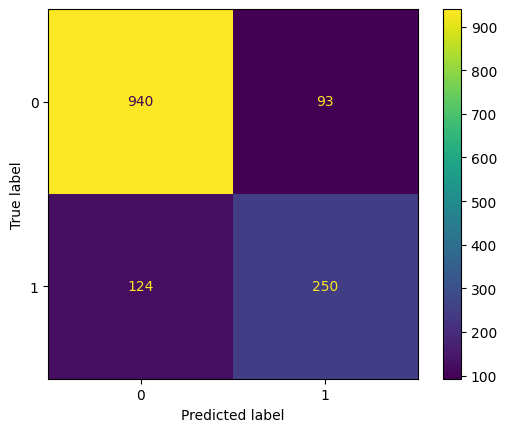

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [173]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.845771144278607
Precision: 0.7288629737609329
Recall: 0.6684491978609626


## Survival Possibility Model


### Kaplan-Meier: single variable

In [175]:
!pip3 install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 9.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=b3c7b6acdbc7ae9e0d3aca938909e3a74b727e5e67ed690d9a9dfb9bb0eff2d9
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which i

In [176]:
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test

from lifelines.fitters.coxph_fitter import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines import KaplanMeierFitter

In [177]:
kmf = KaplanMeierFitter()

T=telco_df['tenure']
C=telco_df['Churn'].astype(float)

kmf.fit(T,C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7032 total observations, 5163 right-censored observations>

<Axes: title={'center': 'Kaplan-Meier Survival Curve: Population level'}, xlabel='timeline'>

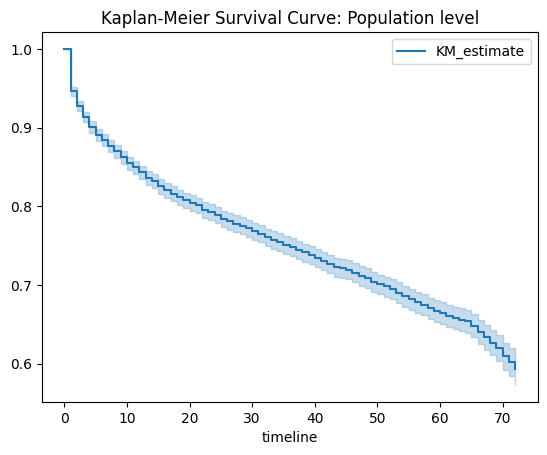

In [178]:
kmf.plot(title='Kaplan-Meier Survival Curve: Population level')

Interpretation: the probability of a customer surviving at least 0 month is 100%. Customer has around 60% probability will survive at least 70 months, given that they have survived 69 months. <p>
Confidence Interval: the wider interval, the smaller confidence. As the data reduces as the timeline moves, which is intuitively that there are less customers comparing the new ones.

In [180]:
def plot_km(col):
  ax = plt.subplot(111)
  for r in telco_df[col].unique():
    if r != 'No internet service' and r != 'No phone service':
      ix = telco_df[col] == r
      kmf.fit(T[ix], C[ix],label=r)
      kmf.plot(ax=ax)


In [181]:
def plot_km(col):
  ax = plt.subplot(111)
  for r in telco_df[col].unique():
    ix = telco_df[col] == r
    kmf.fit(T[ix], C[ix],label=r)
    kmf.plot(ax=ax)


def print_logrank(col):
  log_rank = pairwise_logrank_test(telco_df['tenure'], telco_df[col], telco_df['Churn'])
  return log_rank.summary

In [182]:
def print_logrank(col):
    mask = (telco_df[col] != 'No internet service') & (telco_df[col] != 'No phone service')
    log_rank = pairwise_logrank_test(telco_df[mask]['tenure'], telco_df[mask][col], telco_df[mask]['Churn'])
    return log_rank.summary

When viewing Kaplan-Meier curves at the covariate-level, it's ideal to see some level of divergence between the groups as this indicates a difference that can be used for predictions. This is when survival curves are very close together, check whether they are statistically equivalent.<p>
This is the purpose of the log-rank test. The null hypothesis for the log-rank states that the groups are statistically equivalent. Although it's not useful for prediction to find out that the two groups are statistically equivalent, there are benefits from an inference standpoint. For example, suppose you have a new promotion that provides subscribers with free access to a streaming service. If you find out that those with the service are the same as those without the service, you may ask whether the return on providing free access is high enough to cover costs.


,,test_statistic,p,-log2(p)
Female,Male,0.525707,0.468417,1.094134


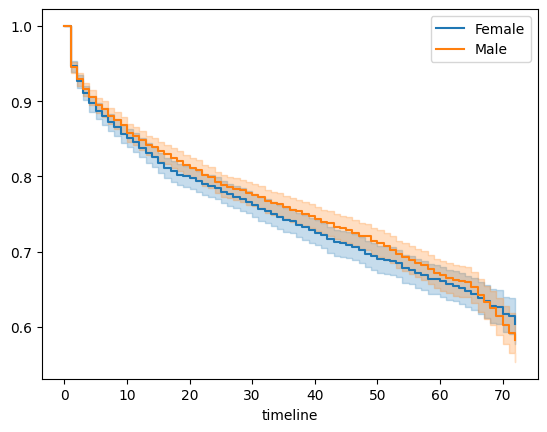

In [183]:
plot_km('gender')
print_logrank('gender')

,,test_statistic,p,-log2(p)
0,1,109.489693,1.267619e-25,82.706081


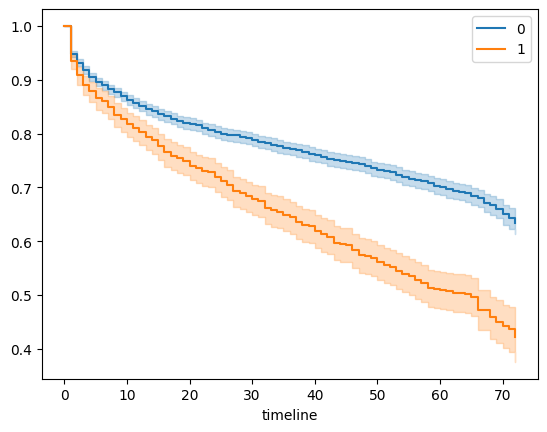

In [184]:
plot_km('SeniorCitizen')
print_logrank('SeniorCitizen')

,,test_statistic,p,-log2(p)
No,Yes,232.699042,1.537238e-52,172.11992


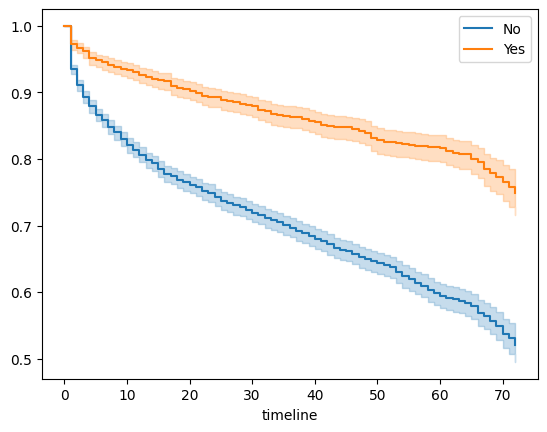

In [185]:
plot_km('Dependents')
print_logrank('Dependents')

,,test_statistic,p,-log2(p)
No,Yes,0.430819,0.511588,0.966947


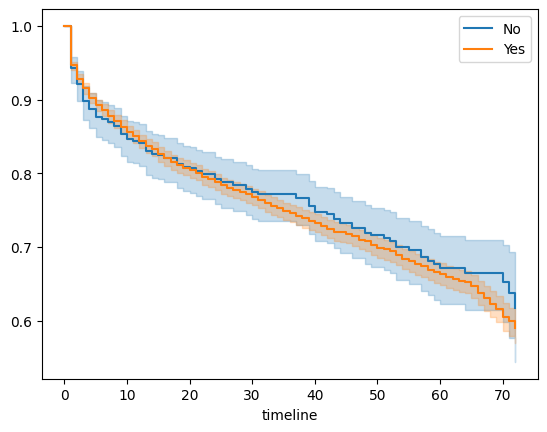

In [186]:
plot_km('PhoneService')
print_logrank('PhoneService')

,,test_statistic,p,-log2(p)
No,Yes,31.262663,2.253726e-08,25.403113


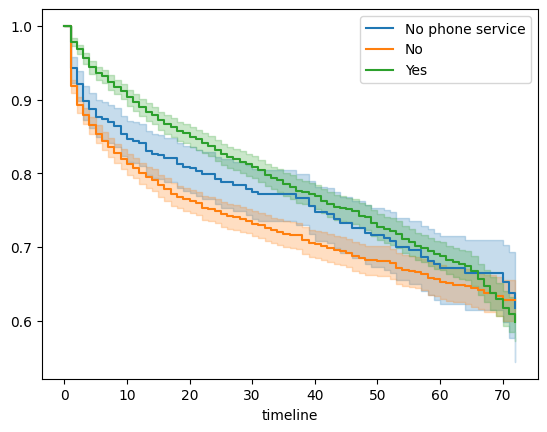

In [187]:
plot_km('MultipleLines')
print_logrank('MultipleLines')

test_statistic             p    -log2(p)
DSL         Fiber optic      227.174973  2.462919e-51  168.117964
            No                80.317890  3.187699e-19   61.444119
Fiber optic No               374.157435  2.328119e-83  274.500867

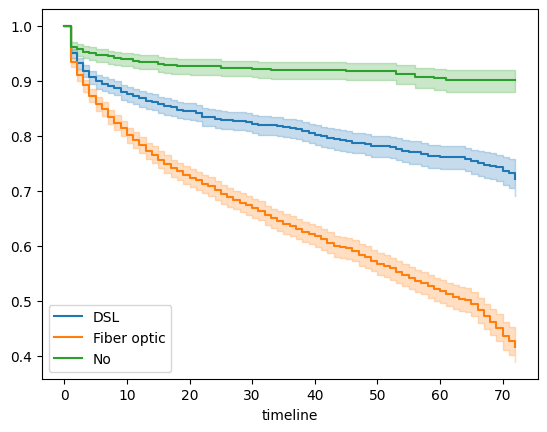

In [188]:
plot_km('InternetService')
print_logrank('InternetService')

,,test_statistic,p,-log2(p)
No,Yes,660.525069,1.148535e-145,481.479779


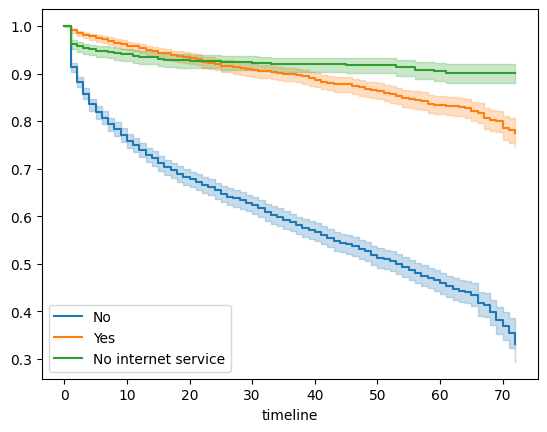

In [189]:
plot_km('OnlineSecurity')
print_logrank('OnlineSecurity')

,,test_statistic,p,-log2(p)
No,Yes,498.689704,1.832589e-110,364.538207


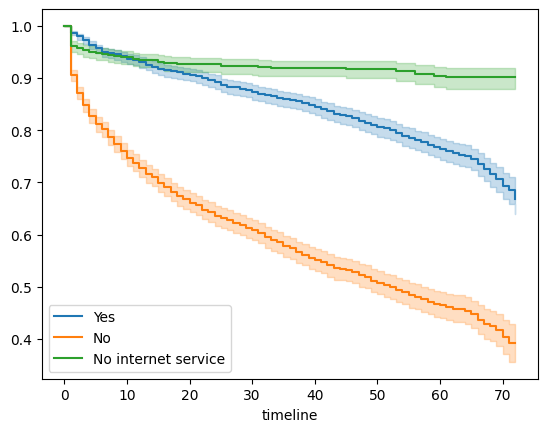

In [190]:
plot_km('OnlineBackup')
print_logrank('OnlineBackup')

,,test_statistic,p,-log2(p)
No,Yes,103.851367,2.180772e-24,78.601435


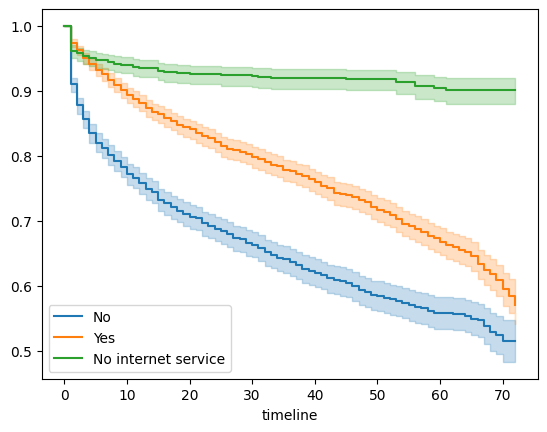

In [191]:
plot_km('StreamingTV')
print_logrank('StreamingTV')

,,test_statistic,p,-log2(p)
No,Yes,112.792732,2.395523e-26,85.10979


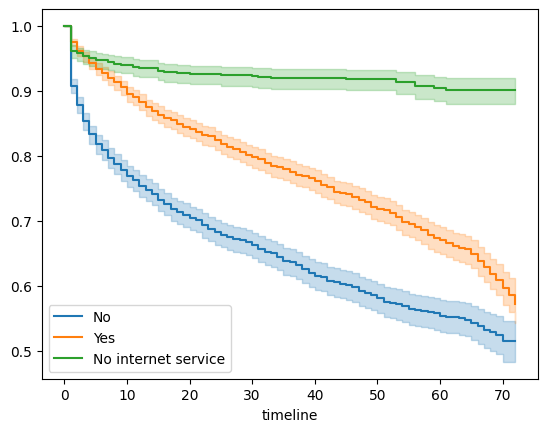

In [192]:
plot_km('StreamingMovies')
print_logrank('StreamingMovies')

,,test_statistic,p,-log2(p)
No,Yes,448.469744,1.552897e-99,328.235919


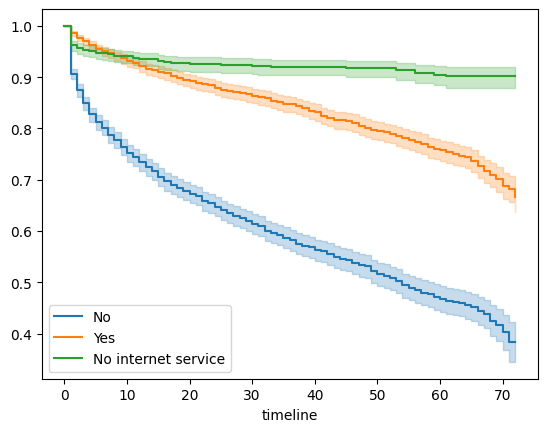

In [193]:
plot_km('DeviceProtection')
print_logrank('DeviceProtection')

,,test_statistic,p,-log2(p)
No,Yes,639.350003,4.627058e-141,466.181766


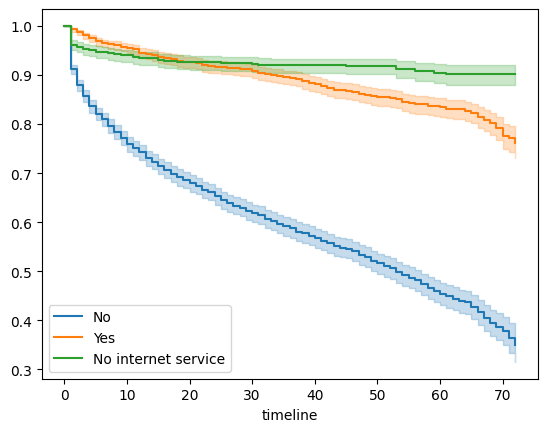

In [194]:
plot_km('TechSupport')
print_logrank('TechSupport')

,,test_statistic,p,-log2(p)
No,Yes,189.511486,4.064094e-43,140.819974


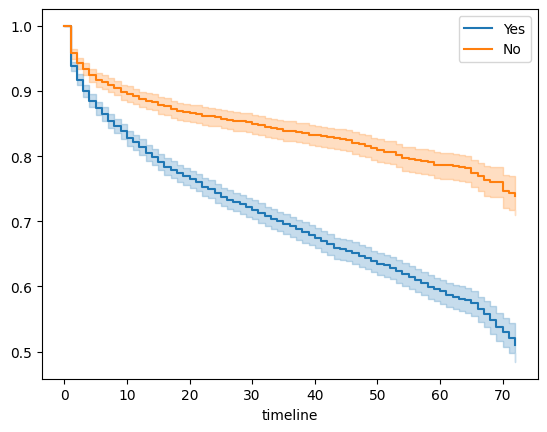

In [195]:
plot_km('PaperlessBilling')
print_logrank('PaperlessBilling')

test_statistic  \
Bank transfer (automatic) Credit card (automatic)        0.868295   
                          Electronic check             510.035059   
                          Mailed check                  51.071855   
Credit card (automatic)   Electronic check             539.740177   
                          Mailed check                  64.815174   
Electronic check          Mailed check                 152.455455   

                                                               p    -log2(p)  
Bank transfer (automatic) Credit card (automatic)   3.514278e-01    1.508700  
                          Electronic check         6.231417e-113  372.738314  
                          Mailed check              8.904593e-13   40.030516  
Credit card (automatic)   Electronic check         2.147615e-119  394.206708  
                          Mailed check              8.226320e-16   50.110602  
Electronic check          Mailed check              5.038297e-35  113.934547

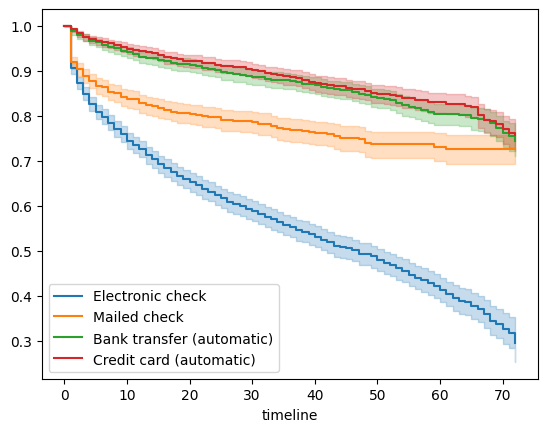

In [196]:
plot_km('PaymentMethod')
print_logrank('PaymentMethod')

test_statistic              p    -log2(p)
Month-to-month One year      926.064559  2.117327e-203  673.269159
               Two year     1550.510307   0.000000e+00         inf
One year       Two year      256.217767   1.145448e-57  189.153989

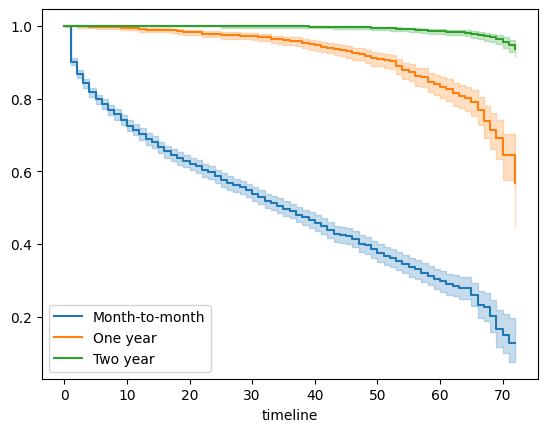

In [197]:
plot_km('Contract')
print_logrank('Contract')

In [198]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn'],
      dtype='object')

### Cox Proportional Hazards: multi-variate analysis.

dropped the value that had a Kaplan-Meier survival probability curve most similar to the population.

In [218]:
cols = ["SeniorCitizen", "Dependents", "InternetService", "OnlineSecurity", "OnlineBackup", "StreamingTV", "StreamingMovies", "DeviceProtection", "TechSupport", "PaperlessBilling", "PaymentMethod", "Contract"]

encode_df = pd.get_dummies(telco_df,
               columns=cols,
               prefix=cols,
               drop_first=False)
encode_df.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service','DeviceProtection_No internet service', 'TechSupport_No internet service'], axis = 1, inplace = True)
encode_df.head()

,gender,Partner,tenure,PhoneService,MultipleLines,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Female,Yes,1,No,No phone service,29.85,29.85,0,0,0,...,False,False,True,False,False,True,False,True,False,False
1,Male,No,34,Yes,No,56.95,1889.50,0,0,0,...,False,True,False,False,False,False,True,False,True,False
2,Male,No,2,Yes,No,53.85,108.15,0,0,1,...,False,False,True,False,False,False,True,True,False,False
3,Male,No,45,No,No phone service,42.30,1840.75,0,3,0,...,True,True,False,True,False,False,False,False,True,False
4,Female,No,2,Yes,No,70.70,151.65,0,0,1,...,False,False,True,False,False,True,False,True,False,False


In [221]:
survival_df = encode_df[['Churn', 'tenure', 'InternetService_DSL', 'OnlineBackup_Yes', 'Contract_Month-to-month']]

In [222]:
survival_df.loc[:,'Churn'] = survival_df.loc[:,'Churn'].astype('float')

In [223]:
cph = CoxPHFitter(alpha=0.05)
cph.fit(survival_df, 'tenure', 'Churn')

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [213]:
# from lifelines.utils import stepwise_selection
# tepwise_selection(cph, survival_df, 'tenure', 'Churn', covariates)

In [224]:
cph.print_summary()

AttributeError: 'Index' object has no attribute '_format_flat'

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -14345.35
         time fit was run = 2024-07-17 12:16:32 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
InternetService_DSL      -0.21       0.81       0.05            -0.32            -0.11                 0.73                 0.90
OnlineBackup_Yes         -0.64       0.52       0.05            -0.75            -0.54                 0.47                 0.58
Contract_Month-to-month   2.98      19.66       0.08             2.82             3.14                16.80                23.00

                          cmp to      z      p   -log2(p)
covariate                                                
InternetService_DSL         0.00  -3.92 <0.005      13.49
OnlineBackup_Yes            0.00 -12.13 <0.005     110.09
Contract_Month-to-month     0.00  37.13 <0.005    1000.22
---
Concordance = 0.80
Partial AIC = 28696.70
log-likelihood ratio test = 2615.38 on 3 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='HR (95% CI)'>

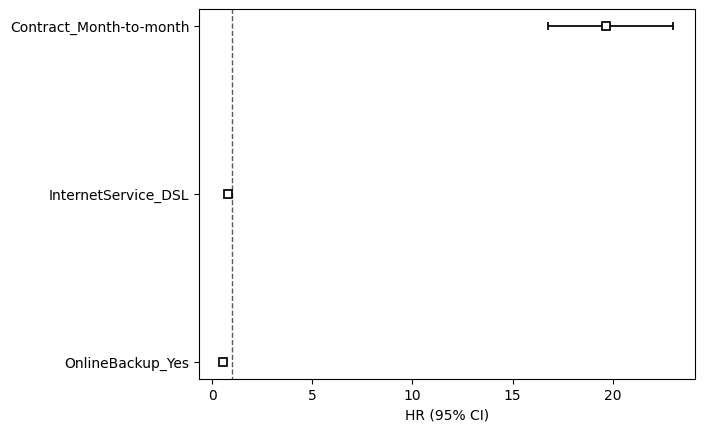

In [225]:
cph.plot(hazard_ratios=True)